In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Load the Fruit-360 dataset
train_dir = "Fruits-360-Dataset/fruits-360_dataset/fruits-360/Training"
test_dir = "Fruits-360-Dataset/Fruits-360_dataset/fruits-360/Test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/10


D:\Study\IIITK-MTech\Semester 3\DSC611 - Machine Learning Principles and Practices\Assignment-1\pythonProject\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2115/2115 ━━━━━━━━━━━━━━━━━━━━ 2741s 1s/step - accuracy: 0.2570 - loss: 2.9422 - val_accuracy: 0.8199 - val_loss: 0.6194
Epoch 2/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 0s 172us/step - accuracy: 0.6250 - loss: 1.3274 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


C:\Users\jayap\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2115/2115 ━━━━━━━━━━━━━━━━━━━━ 192s 91ms/step - accuracy: 0.6455 - loss: 1.0770 - val_accuracy: 0.9141 - val_loss: 0.3410
Epoch 4/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.6250 - loss: 0.8393 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 203s 96ms/step - accuracy: 0.7541 - loss: 0.7363 - val_accuracy: 0.9441 - val_loss: 0.2292
Epoch 6/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.8438 - loss: 0.5279 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 197s 93ms/step - accuracy: 0.8255 - loss: 0.5232 - val_accuracy: 0.9467 - val_loss: 0.2148
Epoch 8/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.8750 - loss: 0.4158 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 204s 96ms/step - accuracy: 0.8572 - loss: 0.4277 - val_accuracy: 0.9624 - val_loss: 0.1726
Epoch 10/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accurac

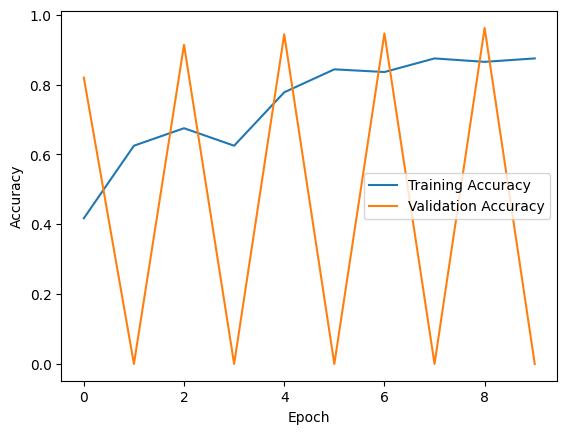

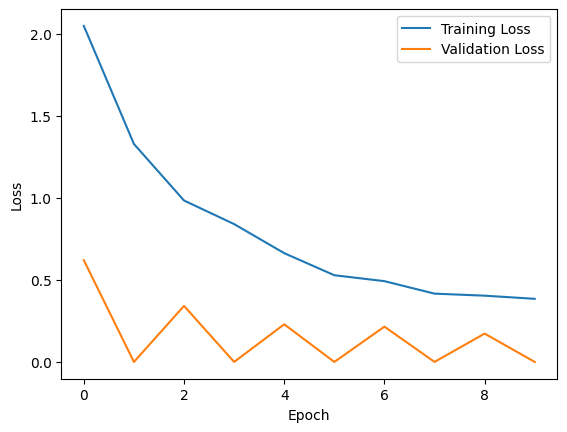

709/709 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
Predicted: Apple Braeburn
709/709 ━━━━━━━━━━━━━━━━━━━━ 27s 37ms/step - accuracy: 0.9536 - loss: 0.2140
Test Loss: 0.16588947176933289
Test Accuracy: 0.9659731984138489


In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(131, activation='softmax')  # 131 classes in the Fruit-360 dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=int(test_generator.samples/test_generator.batch_size))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict results
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Map class indices to class labels
class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
predicted_labels = [class_labels[label] for label in predicted_classes]

# Display some predictions
for i in np.arange(10):
    print("Predicted:", predicted_labels[i])

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
